In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(df.head())

# Get basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:

# Only calculate the mean for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Select relevant features and target variable
features = ['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']
target = 'SalePrice'

X = df[features]
y = df[target]

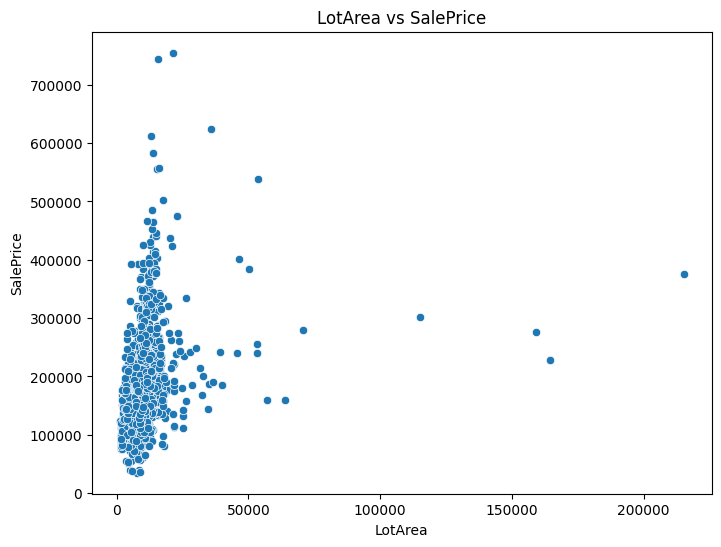

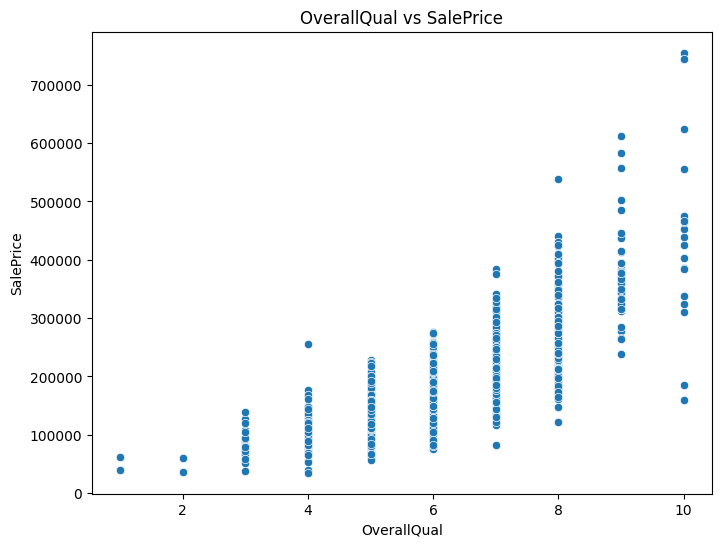

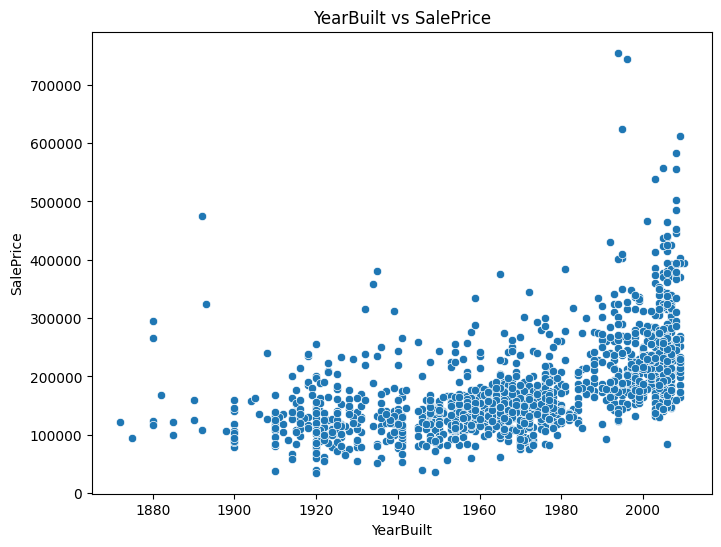

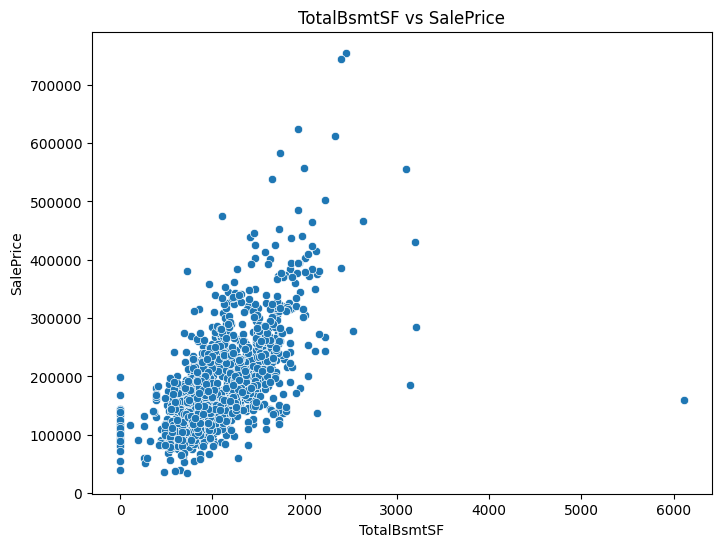

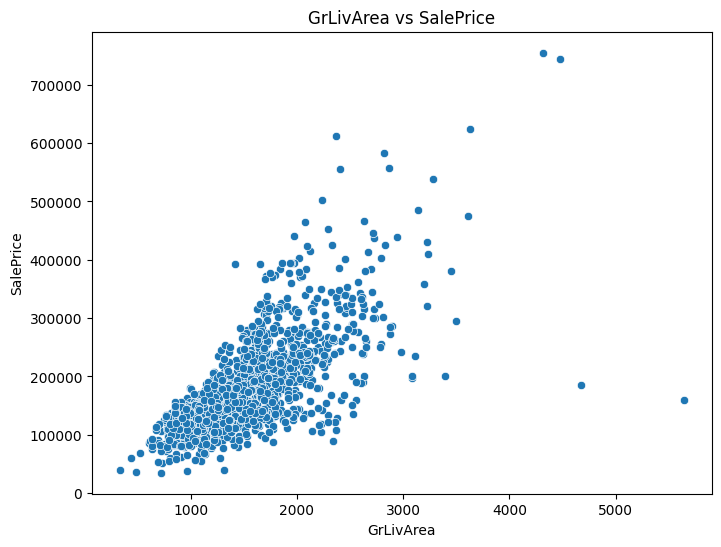

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots to visualize relationships
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1603216326.5427105
R^2 Score: 0.7909845965820215


In [8]:
# Example new data (replace with actual new data)
new_data = pd.DataFrame({
    'LotArea': [8450],
    'OverallQual': [7],
    'YearBuilt': [2003],
    'TotalBsmtSF': [856],
    'GrLivArea': [1710]
})

# Make predictions
predicted_price = model.predict(new_data)
print(f'Predicted SalePrice: {predicted_price[0]}')

Predicted SalePrice: 218817.62959264277
